<a href="https://colab.research.google.com/github/anupojuharshita/GEN_AI-project/blob/main/lane%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/lane_image')

Mounted at /content/lane_image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
image_path=('/content/drive/MyDrive/ai image.jpg')

display image


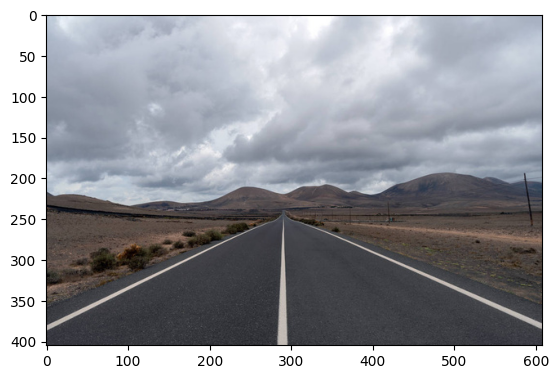

In [ ]:
image = cv2.imread(image_path)
if image is not None:
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.axis('on')
  plt.show()


convert to grayscaler


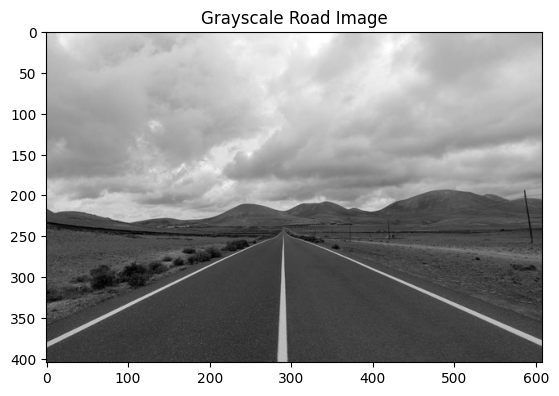

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Road Image")
plt.axis("on")
plt.show()

gaussian filtering

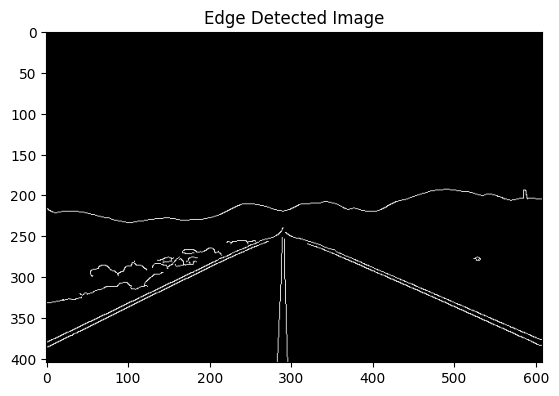

In [ ]:
blurred = cv2.GaussianBlur(gray_image, (7,7), 0)
edges = cv2.Canny(blurred, 50, 150)
plt.imshow(edges, cmap="gray")
plt.title("Edge Detected Image")
plt.axis("on")
plt.show()

In [ ]:
import numpy as np

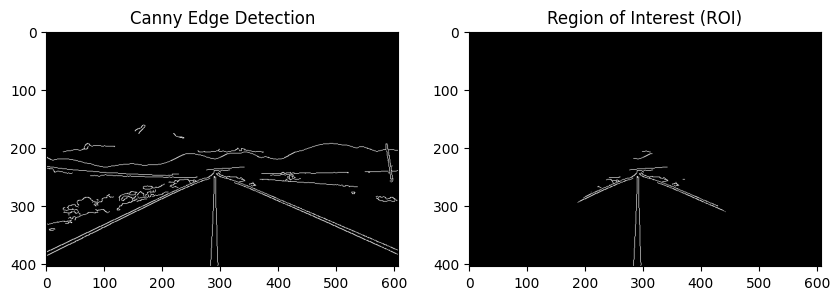

In [ ]:
def region_of_interest(image):
    """
    Applies a mask to keep only the region of interest (ROI).
    """
    height, width = image.shape


    mask = np.zeros_like(image)
    polygon = np.array([
        [(50, height), (width - 50, height), (width // 2, height // 2)]
    ], dtype=np.int32)


    cv2.fillPoly(mask, polygon, 255)

    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

image = cv2.imread("/content/drive/MyDrive/ai image.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5), 0)
edges = cv2.Canny(blurred, 50, 150)


roi_edges = region_of_interest(edges)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")

plt.subplot(1,2,2)
plt.imshow(roi_edges, cmap="gray")
plt.title("Region of Interest (ROI)")

plt.show()

detecting straight lines

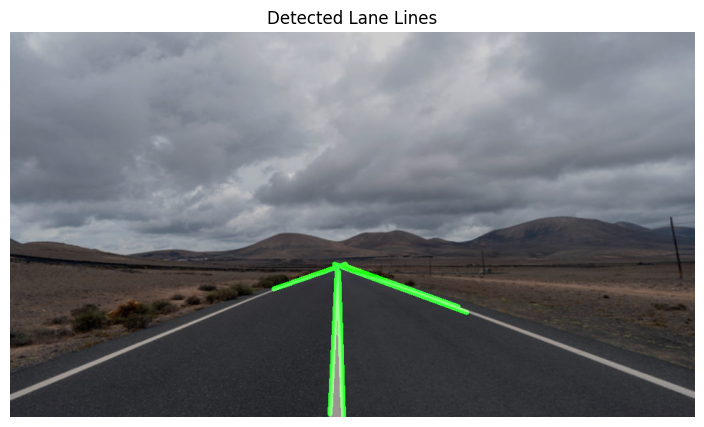

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_lane_lines(image_path):

    image = cv2.imread("/content/drive/MyDrive/ai image.jpg")
    if image is None:
        raise ValueError("Error: Image not found!")

    image = cv2.resize(image, (960, 540))


    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    blur = cv2.GaussianBlur(gray, (5, 5), 0)


    edges = cv2.Canny(blur, 50, 150)


    mask = np.zeros_like(edges)
    height, width = edges.shape
    roi_corners = np.array([[
        (100, height),
        (width // 2 - 50, height // 2 + 50),
        (width // 2 + 50, height // 2 + 50),
        (width - 100, height)
    ]], dtype=np.int32)

    cv2.fillPoly(mask, roi_corners, 255)
    masked_edges = cv2.bitwise_and(edges, mask)

    lines = cv2.HoughLinesP(masked_edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=100, maxLineGap=50)


    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 5)


    output = cv2.addWeighted(image, 0.8, line_image, 1, 0)


    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)


    plt.figure(figsize=(10, 5))
    plt.imshow(output_rgb)
    plt.axis("off")
    plt.title("Detected Lane Lines")
    plt.show()


image_path = "/content/drive/MyDrive/ai image.jpg"
detect_lane_lines("/content/drive/MyDrive/ai image.jpg")
